### Table of Contents

* [Introduction](#introduction)
* [Data](#data)
    * [Loading the Data](#section1_1)
    * [Data Information](#section1_2)
* [Data Cleaning](#cleaning)
    * [Checking Income Variable](#section2_1)
    * [Checking Age Variable](#section2_2)
    * [Checking Education Variable](#section2_3)
* [Exploratory Data Analysis](#eda)
    * [Big Picture](#section3_1)
    * [Purchasing Behavior by Income](#section3_2)
    * [More Purchasing Behavior by Income](#section3_3)
    * [Purchasing Behavior by Education and Income](#section3_4)
    * [Purchasing Behavior by Age](#section3_5)
* [Conclusion](#conclusion)
    

### Introduction <a class="anchor" id="introduction"></a>

This notebook contains an analysis on some marketing data from iFood Brain team, used for hiring Data Analysts.

The steps need to be done for this analysis:
* Get acquainted with and create summary of the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions
* Create a summary of the analysis and write conclusion

### Data <a class="anchor" id="data"></a>

The data for this project was downloaded from Kaggle:
[https://www.kaggle.com/jackdaoud/marketing-data](https://www.kaggle.com/jackdaoud/marketing-data)

And also available publicly on GitHub:
[https://github.com/nailson/ifood-data-business-analyst-test](https://github.com/nailson/ifood-data-business-analyst-test)

Some code inspiration for this analysis was sourced from [this noteboook](https://www.kaggle.com/dimitriirfan/market-eda).

#### Loading the Data <a id="section1_1"></a>
Import the necessary libraries into the notebook. Using Pandas to load the data from marketing_data.csv and preview the DataFrame.

In [1]:
# sets up the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# enables graph in Notebook
%matplotlib inline

In [2]:
# loading the data using pandas
marketing_data = pd.read_csv("ifood_df.csv")

# preview the data
pd.set_option('display.max_columns', None)
marketing_data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


#### Data Information <a class="anchor" id="section1_2"></a>

Some immediate insights are:
* There are 39 columns and 2205 rows.
* The name and datatype of each column -- most values are integers in this dataset.
* The data provided has no missing value.
* The column names could be renamed for more consistency.
* Some basic summary statistics on each of the numerical variables.

In [3]:
marketing_data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [4]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Income                2205 non-null   int64
 1   Kidhome               2205 non-null   int64
 2   Teenhome              2205 non-null   int64
 3   Recency               2205 non-null   int64
 4   MntWines              2205 non-null   int64
 5   MntFruits             2205 non-null   int64
 6   MntMeatProducts       2205 non-null   int64
 7   MntFishProducts       2205 non-null   int64
 8   MntSweetProducts      2205 non-null   int64
 9   MntGoldProds          2205 non-null   int64
 10  NumDealsPurchases     2205 non-null   int64
 11  NumWebPurchases       2205 non-null   int64
 12  NumCatalogPurchases   2205 non-null   int64
 13  NumStorePurchases     2205 non-null   int64
 14  NumWebVisitsMonth     2205 non-null   int64
 15  AcceptedCmp3          2205 non-null   int64
 16  Accept

In [5]:
# see what columns have missing data
marketing_data.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [6]:
print(marketing_data.describe())

              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000 

#### Data Cleaning <a class="anchor" id="cleaning"></a>

As mentioned before, the data is already clean (no missing value found) so there's no need for cleaning. 

The column names overall could also be renamed for more consistency. To do this, the following is done:
* Put all columns in [snake case format](https://www.ssc.wisc.edu/sscc/pubs/DWE/book/4-2-naming-variables.html) using regex and list comprehension
* Change `Income` values to floats

In [7]:
# Clean Columns

# fix `prods` column name for consistency
marketing_data.rename(columns={'MntGoldProds':'MntGoldProducts', 'MntRegularProds':'MntRegularProducts'}, inplace=True)

# taking dollar sign out of values and convert to float
marketing_data['Income'] = marketing_data['Income'].replace('[\$,]', '', regex=True).astype(float)

# summary stats
marketing_data['Income'].describe()

# put all columns into snake case format
marketing_data.columns = [re.sub(r'(?<![\s])(?<!_)(?<!^)(?=[A-Z])', '_', x).lower() for x in marketing_data.columns]
print('New Column Name:\n',marketing_data.columns.tolist())

New Column Name:
 ['income', 'kidhome', 'teenhome', 'recency', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_products', 'num_deals_purchases', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month', 'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1', 'accepted_cmp2', 'complain', 'z_cost_contact', 'z_revenue', 'response', 'age', 'customer_days', 'marital_divorced', 'marital_married', 'marital_single', 'marital_together', 'marital_widow', 'education_2n cycle', 'education_basic', 'education_graduation', 'education_master', 'education_ph_d', 'mnt_total', 'mnt_regular_products', 'accepted_cmp_overall']


#### Checking Income Variable <a class="anchor" id="section2_1"></a>
`Income` is one of the main variables that will be explored in the analysis, so it is essential that it is tidy and ready for exploration. The `Income` distribution is then looked at using boxplots to check for any outlier data. The distribution is pretty symmetric, so it's ready for analysis

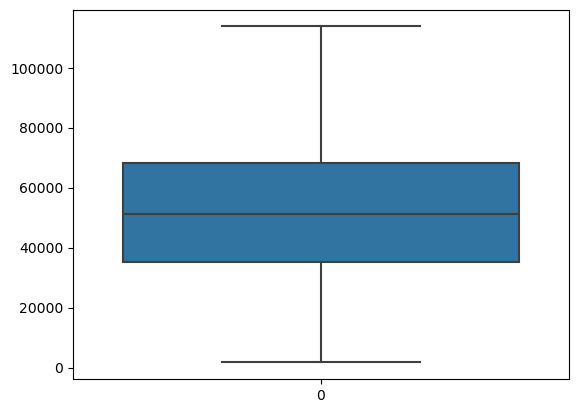

In [8]:
# create boxplot for income column
plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()

#### Checking Age Variable <a class="anchor" id="section2_2"></a>
As another main variable that will be analyzed, `Age` is also looked at using boxplot to check for any outlier data. The distribution is also pretty symmetric, so it's ready for analysis.

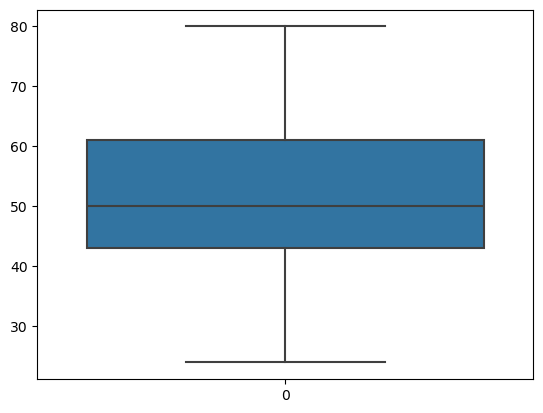

count    2205.000000
mean       51.095692
std        11.705801
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: age, dtype: float64

In [9]:
# create boxplot for age column
plt.figure()
sns.boxplot(marketing_data["age"])
plt.show()

marketing_data["age"].describe()

#### Checking the Education Variable <a class="anchor" id="section2_3"></a>

The `Education` variable is another column that will be focused on in the analysis. The `Education` variable is divided into several columns, one for each education level: `Basic`, `2n Cycle`, `Graduation`, `Master`, and `PhD`. So first, we need to combine them into one column for analysis.

A boxplot is used to see if any cleaning is needed before EDA. There is no missing data or other issues, so it can be left as is.

In [10]:
# combining boolean columns of education levels into one education column
ed_col = ['education_2n cycle', 'education_basic', 'education_graduation', 'education_master', 'education_ph_d']
ed_map = {'education_basic' : 'Basic', 
          'education_graduation' : 'Graduation', 
          'education_2n cycle' : '2n Cycle', 
          'education_master' : 'Master', 
          'education_ph_d' : 'PhD'}

def education_mapping(row):
    for i in range(len(ed_col)):
        if row[ed_col[i]] == 1:
            return ed_map[ed_col[i]]
        else:
            continue
    return None

marketing_data['education'] = marketing_data.apply(education_mapping, axis=1)
print(marketing_data['education'].head())

0    Graduation
1    Graduation
2    Graduation
3    Graduation
4           PhD
Name: education, dtype: object


<Figure size 640x480 with 0 Axes>

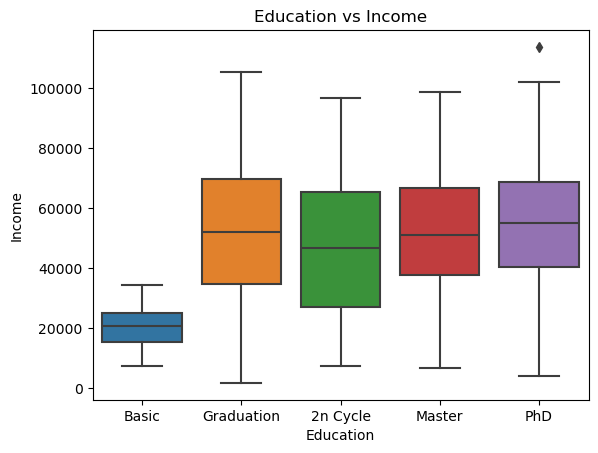

In [11]:
# create boxPlot graph of income for each education level
plt.clf()
plt.figure()
sns.boxplot(data=marketing_data, x='education', y='income', order=list(ed_map.values()))

plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Education vs Income')
plt.show()

### Exploratory Data Analysis <a class="anchor" id="EDA"></a>

After some data cleaning and tidying, the DataFrame is ready for EDA. The following independent variables will be focused on in the analysis:
* `income`
* `education`
* `age`

The goal will be to see how these independent variables associate with the following dependent variables:
* `mnt_wines`
* `mnt_fruits`
* `mnt_meat_products`
* `mnt_fish_products`
* `mnt_sweet_products`  
* `mnt_gold_products`  
* `num_deals_purchases`
* `num_web_purchases`  
* `num_catalog_purchases`  
* `num_store_purchases`

The hope is that through summary statistics and visualizations the following question can be answered:
* Does a shopper's income, education level, and/or age relate to their purchasing behavior? 

Along the way, this question may be refined and more questions may pop up.

#### Big Picture <a class="anchor" id="section3_1">

In order to observe the dataset as a whole, `DataFrame.hist()` is used.. It gives a full view of all numerical variables in the distribution. Most of the amount bought and number purchased variables are skewed right and have similar distributions.

Next, correlations between all numerical variables are viewed using a heat matrix. The heat matrix shows that `income` has the strongest association with numerous variables. Interestingly, it showed that `age` may not be a huge factor overall. This is something to look into it a bit more in the analysis.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6132\444885302.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  marketing_data.hist(ax = ax);


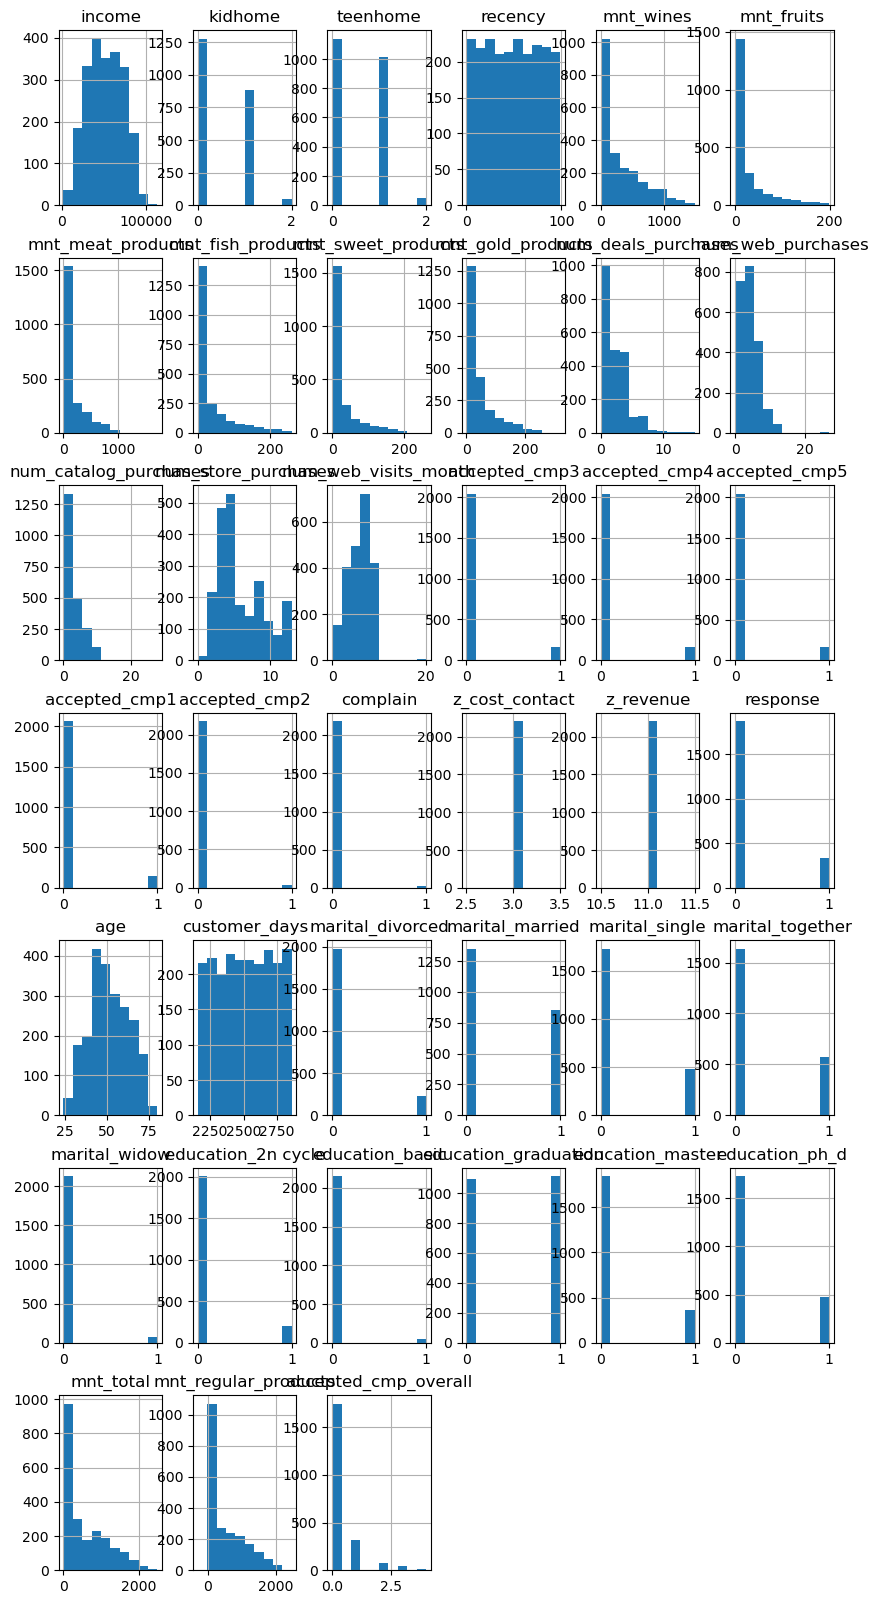

In [12]:
fig = plt.figure(figsize = (10,20))
ax = fig.gca()
marketing_data.hist(ax = ax);

This overview shows that the purchase behavior columns are all skewed to the right.

In [19]:
# dropping non-numerical columns
marketing_corr = marketing_data.drop(columns=['education',]).corr()

# dropping calculated columns
marketing_corr = marketing_corr.drop(columns=['mnt_total']).corr()

# calculate the average absolute correlation for each variable
marketing_corr['average_total_corr'] = marketing_corr.abs().mean(axis=1)
marketing_corr

,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_products,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_cost_contact,z_revenue,response,age,customer_days,marital_divorced,marital_married,marital_single,marital_together,marital_widow,education_2n cycle,education_basic,education_graduation,education_master,education_ph_d,mnt_regular_products,accepted_cmp_overall,average_total_corr
income,1.000000,-0.929135,-0.289006,-0.058933,0.952399,0.889825,0.952411,0.895913,0.899462,0.812475,-0.469530,0.816072,0.969355,0.951693,-0.931292,-0.030366,0.437483,0.737117,0.682332,0.225047,-0.196652,NaN,NaN,0.402777,0.326502,-0.025551,-0.018160,-0.010072,-0.007753,-0.000112,0.083602,-0.138532,-0.477151,0.104537,-0.005332,0.120718,0.977009,0.619099,0.484539
kidhome,-0.929135,1.000000,0.222731,0.044268,-0.900164,-0.844341,-0.882192,-0.852352,-0.851054,-0.813514,0.467123,-0.806006,-0.922143,-0.916305,0.865948,0.029526,-0.409297,-0.645091,-0.599061,-0.219071,0.176822,NaN,NaN,-0.353021,-0.398484,-0.064258,-0.003019,0.029818,0.017507,0.001224,-0.136891,0.107814,0.360937,-0.084512,0.023629,-0.102698,-0.914891,-0.551785,0.459629
teenhome,-0.289006,0.222731,1.000000,0.031512,-0.280396,-0.458957,-0.495219,-0.473846,-0.454273,-0.279857,0.675832,-0.012947,-0.384312,-0.201456,0.393267,-0.199916,-0.111192,-0.509598,-0.480413,-0.168526,0.027872,NaN,NaN,-0.432002,0.507888,0.016585,0.119723,0.029731,-0.223195,0.066123,0.085561,-0.101656,-0.127304,-0.108329,0.084397,0.175427,-0.401432,-0.431735,0.279506
recency,-0.058933,0.044268,0.031512,1.000000,-0.079342,-0.055601,-0.050072,-0.048504,-0.035694,-0.056234,-0.024162,-0.092767,-0.056285,-0.048984,-0.000020,-0.157167,-0.074422,-0.106489,-0.135867,-0.094161,-0.008418,NaN,NaN,-0.398556,-0.005608,-0.041333,-0.017394,-0.021554,-0.017103,0.063674,-0.031456,-0.012725,0.007840,0.071997,-0.051185,-0.044310,-0.066128,-0.151171,0.090582
mnt_wines,0.952399,-0.900164,-0.280396,-0.079342,1.000000,0.802487,0.910609,0.809922,0.813669,0.773534,-0.379162,0.845934,0.940626,0.922484,-0.813782,0.029190,0.560610,0.780323,0.704065,0.324454,-0.224547,NaN,NaN,0.488401,0.291899,0.104307,-0.013672,-0.006105,-0.011357,0.003319,0.063064,-0.178122,-0.429101,0.035763,0.015505,0.199699,0.973016,0.702797,0.482329
mnt_fruits,0.889825,-0.844341,-0.458957,-0.055601,0.802487,1.000000,0.926570,0.950458,0.943391,0.827115,-0.502420,0.706316,0.905556,0.864764,-0.875603,-0.029096,0.201463,0.601995,0.571005,0.065730,-0.154501,NaN,NaN,0.337919,0.128803,0.060148,-0.030676,-0.017932,0.042048,-0.018300,0.052949,-0.039229,-0.332366,0.225583,-0.092687,-0.073138,0.899719,0.450529,0.443867
mnt_meat_products,0.952411,-0.882192,-0.495219,-0.050072,0.910609,0.926570,1.000000,0.935947,0.927487,0.807511,-0.538336,0.732920,0.970789,0.895072,-0.913709,0.010987,0.345829,0.742330,0.688739,0.177461,-0.181185,NaN,NaN,0.461920,0.160070,0.052305,-0.052808,-0.027970,0.063829,-0.010982,0.047867,-0.108710,-0.375131,0.152323,-0.036862,0.032069,0.979035,0.601393,0.479129
mnt_fish_products,0.895913,-0.852352,-0.473846,-0.048504,0.809922,0.950458,0.935947,1.000000,0.947442,0.838502,-0.513321,0.703920,0.919380,0.865638,-0.886325,-0.035522,0.215212,0.607683,0.605380,0.080872,-0.167849,NaN,NaN,0.336382,0.143690,0.062102,-0.050676,-0.032649,0.041961,0.007140,0.065269,-0.014781,-0.330616,0.216150,-0.085320,-0.083017,0.907805,0.467254,0.449967
mnt_sweet_products,0.899462,-0.851054,-0.454273,-0.035694,0.813669,0.943391,0.927487,0.947442,1.000000,0.813842,-0.503197,0.718617,0.911442,0.867550,-0.880226,-0.035056,0.235212,0.635618,0.608542,0.092503,-0.172741,NaN,NaN,0.342715,0.135453,0.058663,-0.041039,-0.008236,0.026603,-0.014521,0.069471,-0.015450,-0.335032,0.215685,-0.100928,-0.067344,0.906667,0.485453,0.449174
mnt_gold_products,0.812475,-0.813514,-0.279857,-0.056234,0.773534,0.827115,0.80751

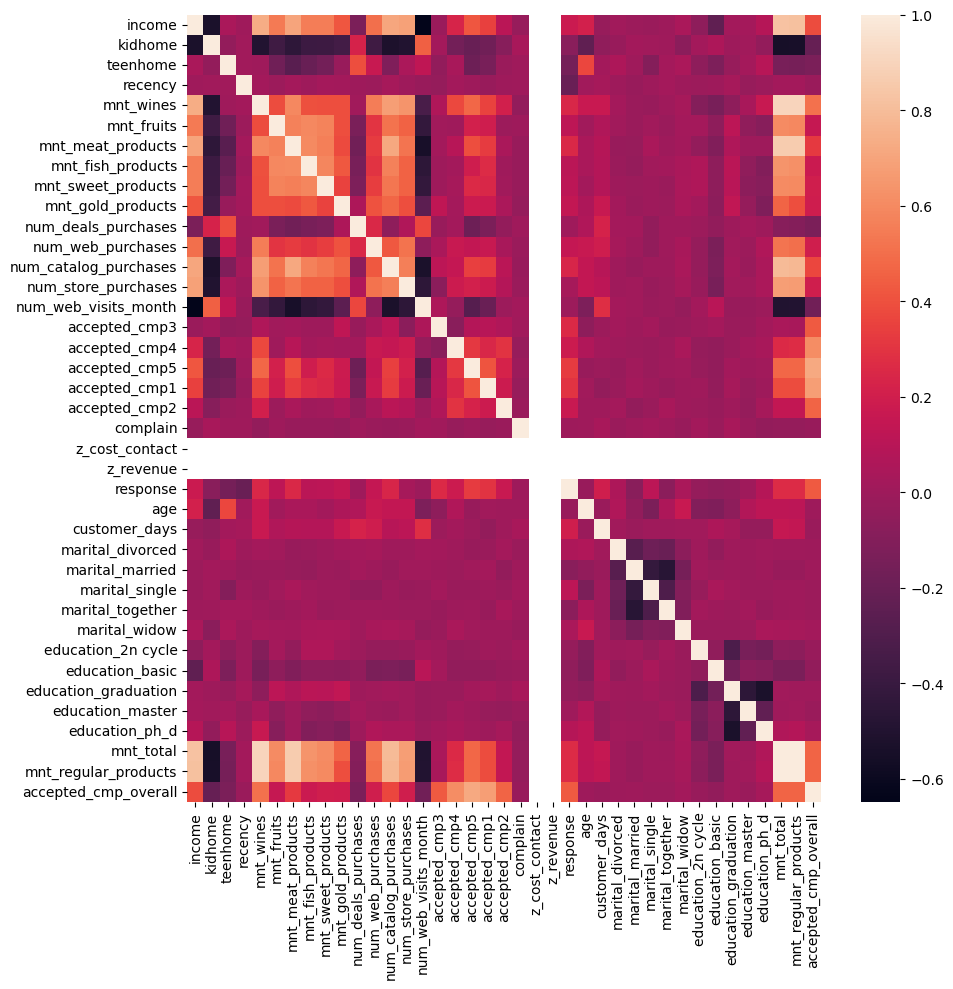

In [15]:
plt.figure(figsize=(10,10))
# heat matrix that shows correlation across all numerical variables
sns.heatmap(data=marketing_corr,annot=False)
plt.tight_layout()
plt.show()

The table of correlations does not offer much help as there are too many numbers to read through. However, the heat map shows that `income` will be the major variable to focus on in the analysis. 

#### Purchasing Behavior by Income <a class="anchor" id="section3_2"></a>

Now it's time to start looking into the big question. A `for` loop is used to see the relationship bewteen `income` and each `num_{type}_purchases` variable. The `hue` parameter with the `education` variable is used to see if there are any patterns that can be deciphered between `education` and `num_{type}_purchases`. 

First scatterplots are used and then regression plots are used for this analysis.

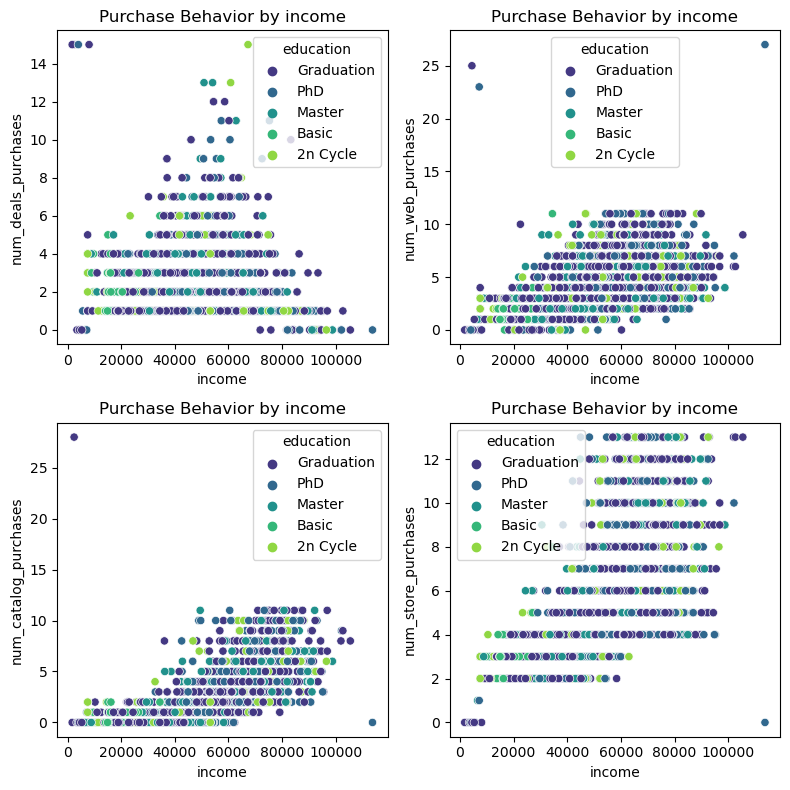

In [16]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
# keeps count of plot for subplots
plot = 0
fig = plt.figure(figsize=(8,8))
# loop through number of columns to plot
for i in range(len(num_purchases_cols)):
    plot += 1
    # subplot to create grid of plots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of purchase type vs income with education
    sns.scatterplot(x=marketing_data["income"], y= marketing_data[num_purchases_cols[i]], 
                    hue=marketing_data["education"], palette="viridis")
    plt.title("Purchase Behavior by income")

plt.tight_layout()
plt.show()

There is a fairly strong, positive linear relationship between `income` and the following three variables:
* `num_catalog_purchases`
* `num_store_purchases`
* `num_web_purchases`

Between `income` and `NumDealsPurchaes`, however, there is no obvious relationship. It appears there might be a weak, negative linear relationship but it is not strong enough to be confident. It is also difficult to decipher any patterns associated with `education` in the plots, so further analysis will be done on this variable.

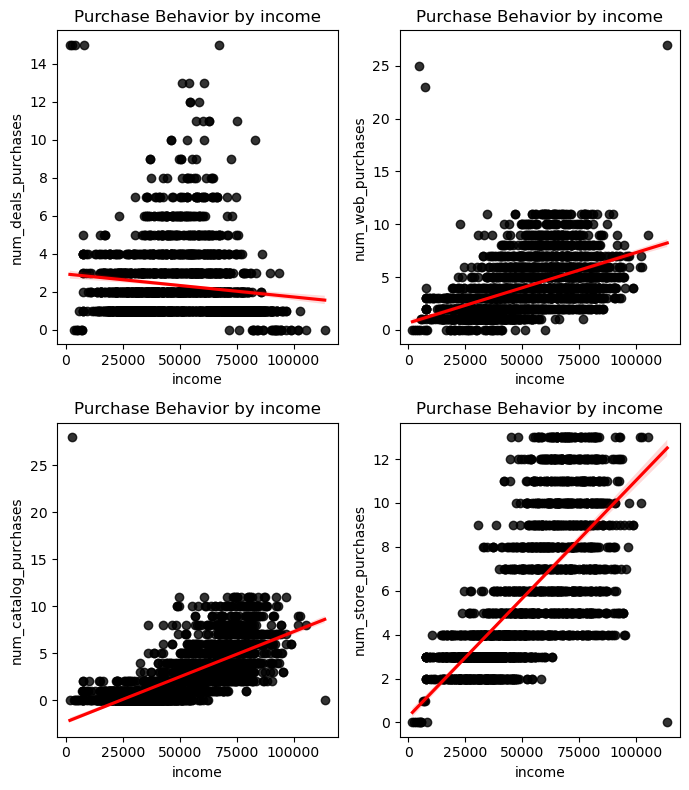

In [17]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
# keeps count of plot for subplots
fig = plt.figure(figsize=(7,8))
plot = 0
# loop through number of columns to plot
for i in range(len(num_purchases_cols)):
    plot += 1
    # set up subplots
    ax = plt.subplot(2, 2, plot)
    # regression plot of purchases vs. income
    sns.regplot(x=marketing_data["income"], y= marketing_data[num_purchases_cols[i]], 
                scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

To get a better look at the linear relationships, `.regplot()` was used. `num_catalog_purchases` and `num_store_purchases` have the strongest positive, linear relationship with `income`. 

These plots also show that `income` and `num_deals_purchases` have a linear, negative relationship; however, it is still too weak to be conclusive.

For some further analysis, a new column in the DataFrame called `total_purchases` is added to the `marketing_data` DataFrame. It is the sum of all `num_{type}_purchases` variables. The same analysis with `.scatterplot()` and `.regplot()` plot methods is done on this new column.

In [18]:
# add new total_purchases column to marketing_data
marketing_data["total_purchases"] = marketing_data["num_deals_purchases"]+marketing_data["num_catalog_purchases"] + marketing_data["num_web_purchases"] + marketing_data["num_store_purchases"]

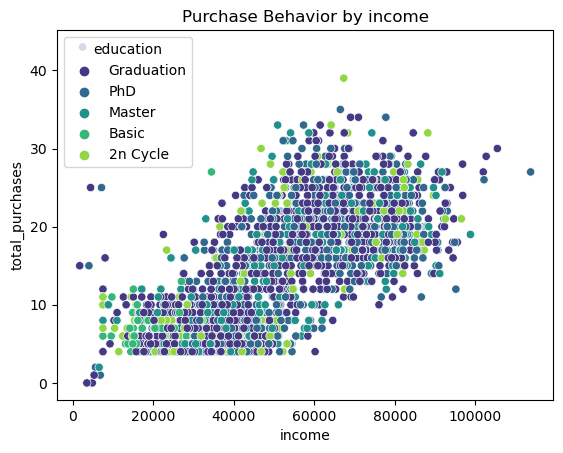

In [19]:
plt.figure()
# scatterplot of total_purchases vs. income
sns.scatterplot(y=marketing_data["total_purchases"], x=marketing_data["income"], 
                hue=marketing_data['education'], palette="viridis")
plt.title("Purchase Behavior by income")
plt.show()

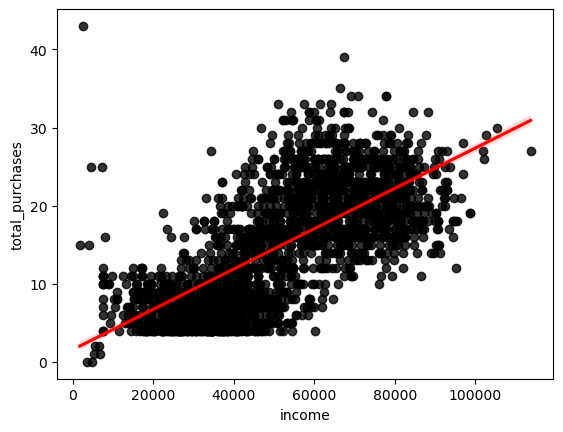

In [20]:
plt.figure()
# regression plot of total_purchases vs income
sns.regplot(y=marketing_data["total_purchases"], x=marketing_data["income"], 
            scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

The overall relationship between `income` and `total_purchases` is strong and linear. Unfortunately, it is still hard to decipher any relationship with the `education` and `total_purchases` as the points are scattered randomly across the plot.

#### More Purchasing Behavior by Income <a class="anchor" id="section3_3"></a>

The following analysis is very similar as before. However, instead of looking at the relationship between `income` and `num_{type}_purchases`, this analysis will be looking at the relationship between `income` and `mnt_{type}_products`. The steps for this analysis will essentially be the same.

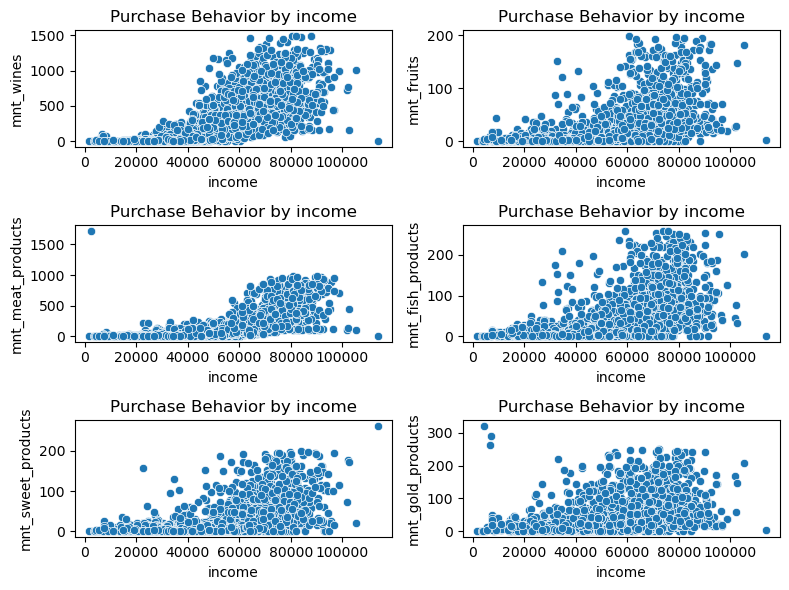

In [21]:
# amounts of items list
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]
plot = 0
fig = plt.figure(figsize=(8,6))
# for loop to go through length of amounts list
for i in range(len(amounts_list)):
    plot += 1
    # set up subplots
    ax = plt.subplot(3, 2, plot)
    # scatterplot of amount of items bought vs. income
    sns.scatterplot(y= marketing_data[amounts_list[i]], x=marketing_data["income"])
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

These plots all show a positive relationship between `income` and each `mnt_{type}_products` variable. However, there is not enough visual evidence to see that it is linear. For further analysis, The *log* scale of the the `income` variable and the `mnt_{type}_products` variables are plotted.

C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  r

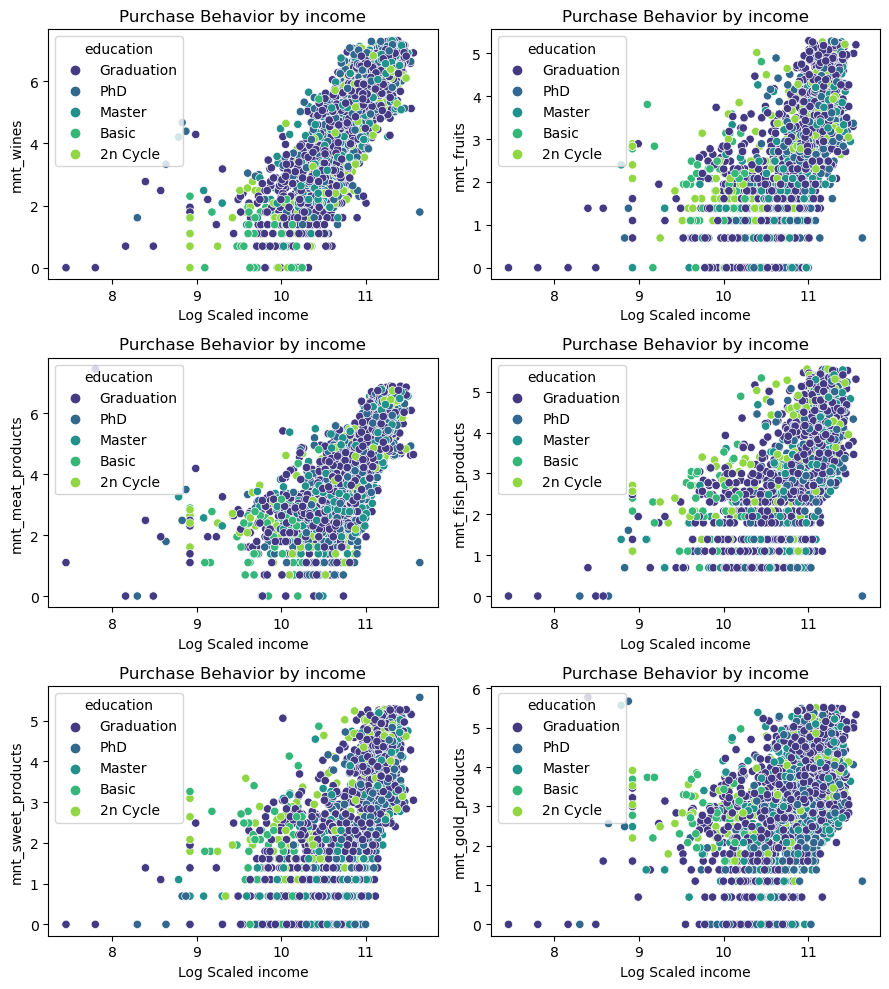

In [22]:
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]
axes = [None for column in amounts_list]
plot = 0
fig = plt.figure(figsize=(9,10))
for i in range(len(amounts_list)):
    plot += 1
    ax = plt.subplot(3, 2, plot)
    sns.scatterplot(y=np.log(marketing_data[amounts_list[i]]), x=np.log(marketing_data["income"]), 
                    hue=marketing_data["education"], palette="viridis")
    ax.set_xlabel("Log Scaled income")
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

With the *log* scaled variables, it is easy to see there is an fairly strong linear, positive relationship between the variables across the board. It is still hard to see how education plays a role, however.

#### Purchasing Behavior by Education and Income <a class="anchor" id="section3_4"></a>

A seaborn method called `.FacetGrid()` is used to see how education effects purchasing behavior along with `income`. It gives a much clearer picture than the `hue` parameter in previous plots. In this analysis, a loop and a dynamic Python variable are used to plot six sets of `.FacetGrid()` plots.

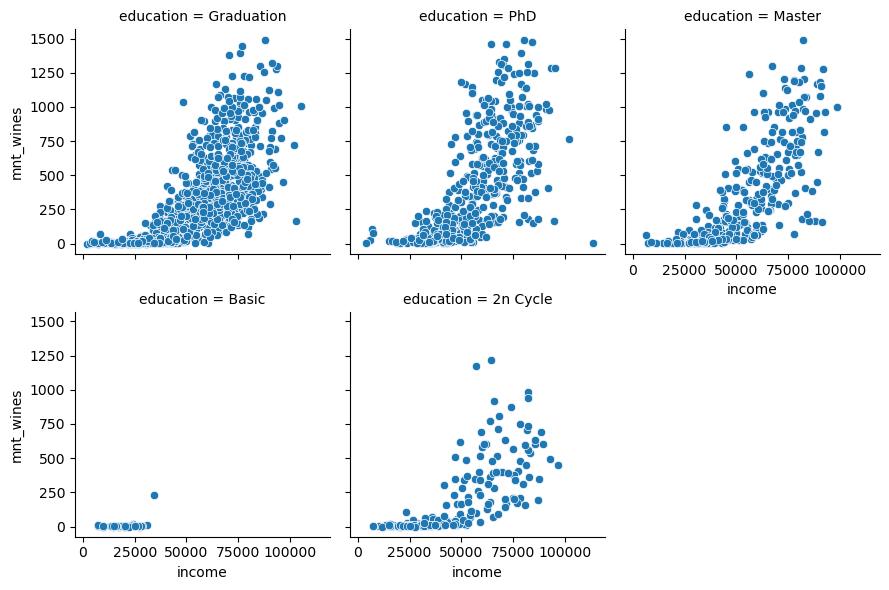

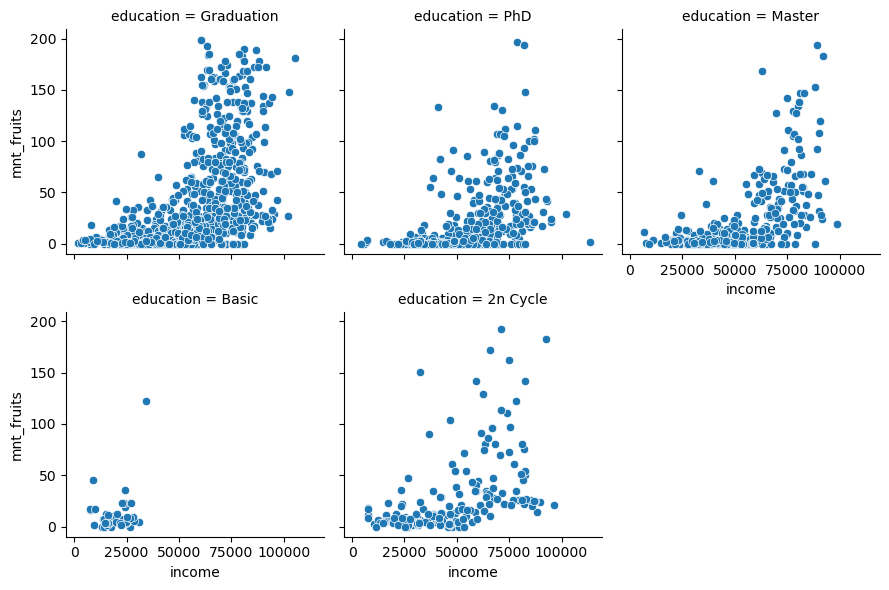

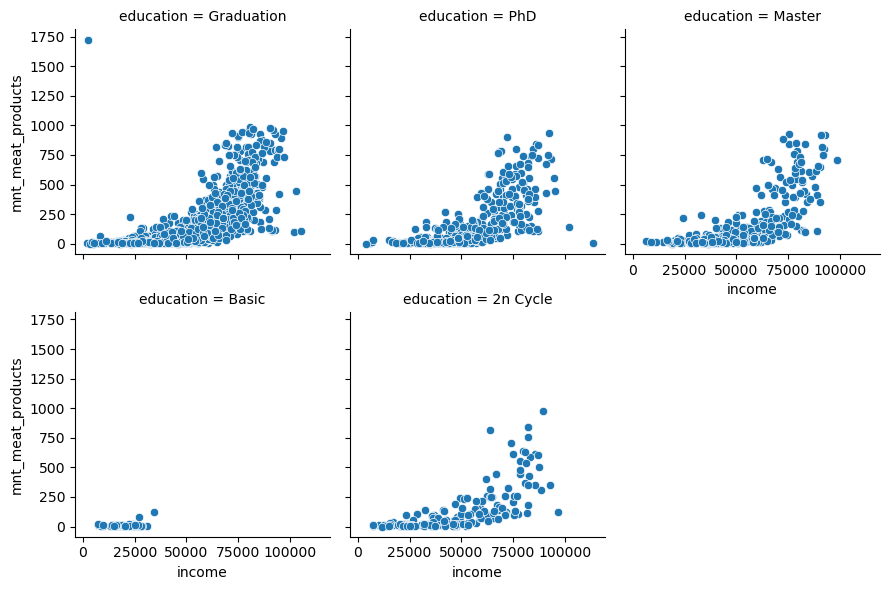

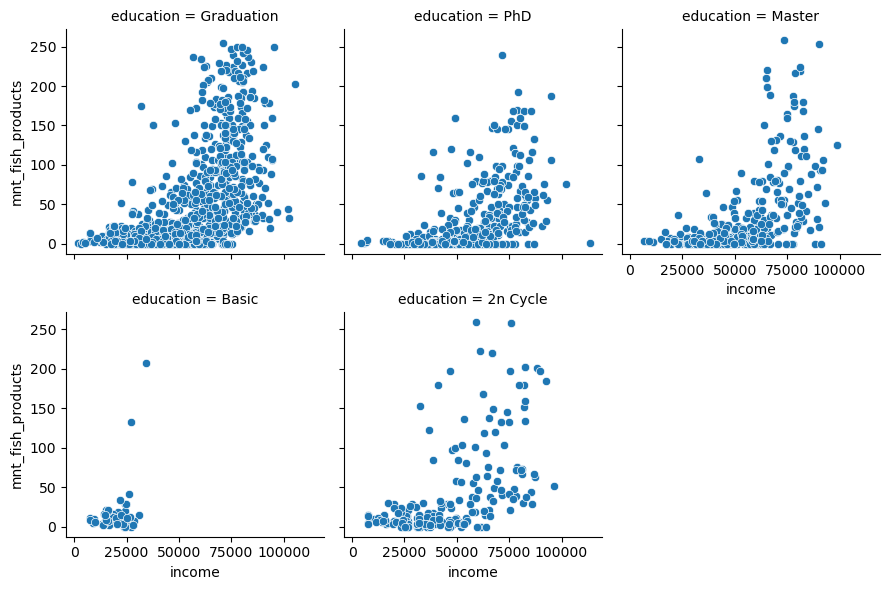

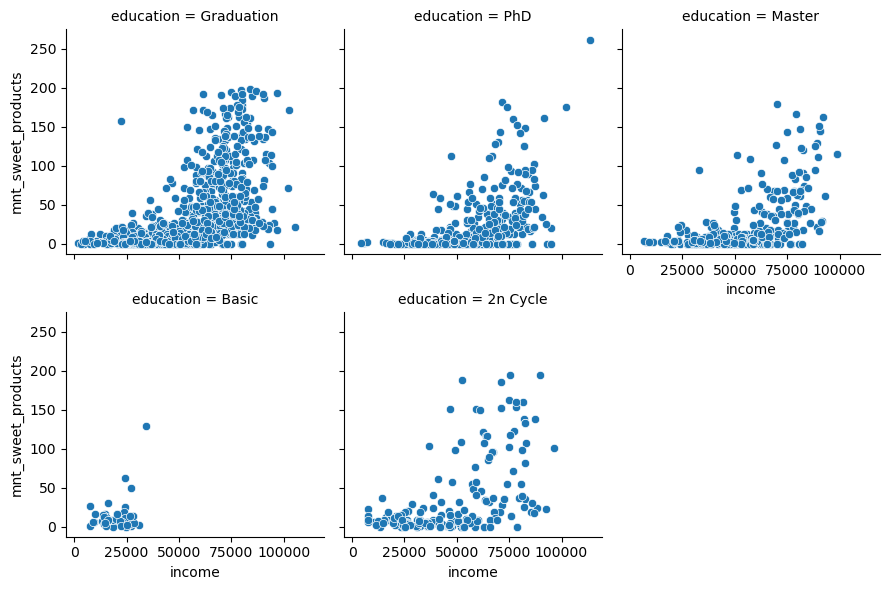

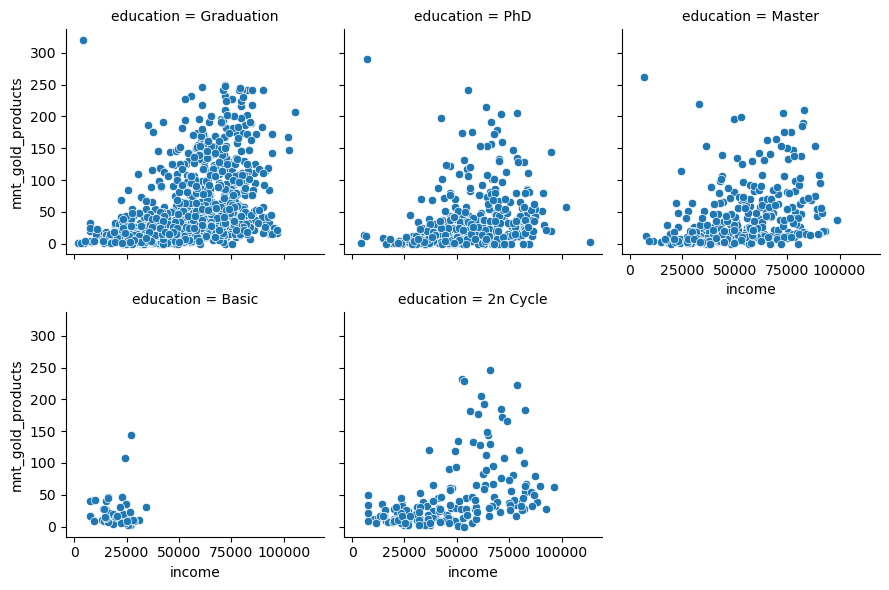

In [23]:
# dictionary used to contain dynamic variables
variable_names = {}
#amounts columns list
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]

for i in range(6):
    # defining the facet grid
    variable_names["g{0}".format(i)] = sns.FacetGrid(marketing_data, col="education", col_wrap=3)
    # mapping the facet grid with scatterplots of amounts product vs. income
    variable_names["g{0}".format(i)].map(sns.scatterplot, "income", amounts_list[i])
plt.show()

After observing the plots detailing the relationship between income, education, and purchasing behavior, the following can be seen:
* This store does not have many shoppers with a `Basic` education level.
* Regardless of the shopper's educational level, there is a positive, linear relationship for each `mnt_{type}_products`.
* `mnt_wines` has the strongest positive, linear relationship with `education` by `income`.

#### Purchasing Behavior by Age <a class="anchor" id="section3_5"></a>

The last main variable in our analysis plan is `age`. The `.scatterplot()` method is used to see if there is any relationship bewteen `age` and any purchasing behavior variables. The initial analysis showed no evidence of relationship as shown in all the graphs below. The graphs shown are:
* `total_purchases` vs. `age`
* `mnt_{type}_products` vs. `age`
* `num_{type}_purchases` vs. `age`

The process used to plot each one of these graphs is very similar to the one outlined in the Purchasing Behavior by income section.

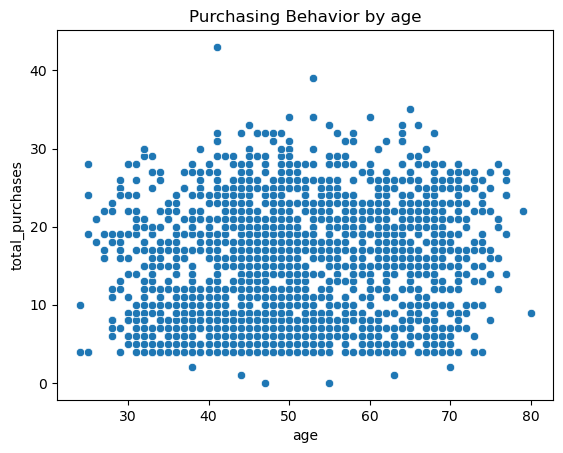

In [24]:
plt.figure()
# scatterplot of total purchases vs. age
sns.scatterplot(x=marketing_data["age"], y=marketing_data["total_purchases"])
plt.title("Purchasing Behavior by age")
plt.show()

It is hard to see any relationship between `age` and `total_purchases` in this plot.

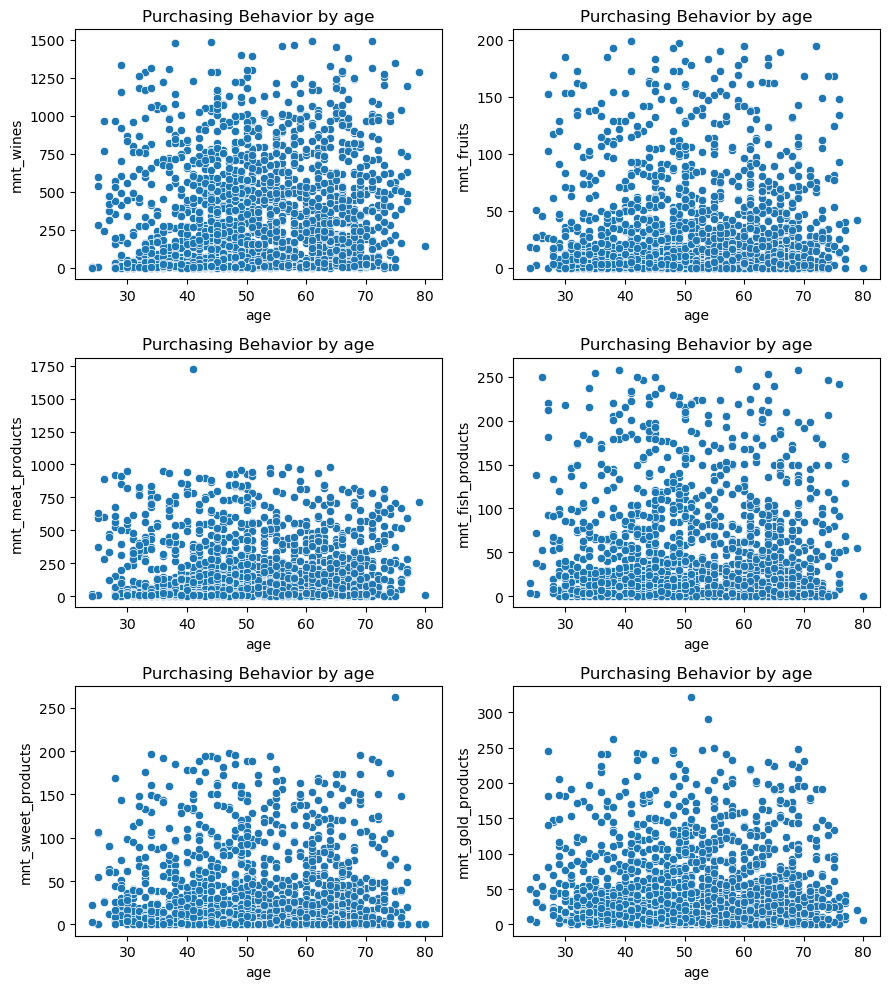

In [25]:
# amounts columns list
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]
plot = 0
fig = plt.figure(figsize=(9,10))
# looping through the length of the amounts columns list
for i in range(len(amounts_list)):
    plot += 1
    # setting up the subplots
    ax = plt.subplot(3, 2, plot)
    # plotting amounts purchased vs. income
    sns.scatterplot(y= marketing_data[amounts_list[i]], x=marketing_data["age"])
    plt.title("Purchasing Behavior by age")
plt.tight_layout()
plt.show()

Again, it is difficult to decipher any pattern between `age` and any `mnt_{type}_products` in any of these plots. A different strategy may be useful to analyze `age`.

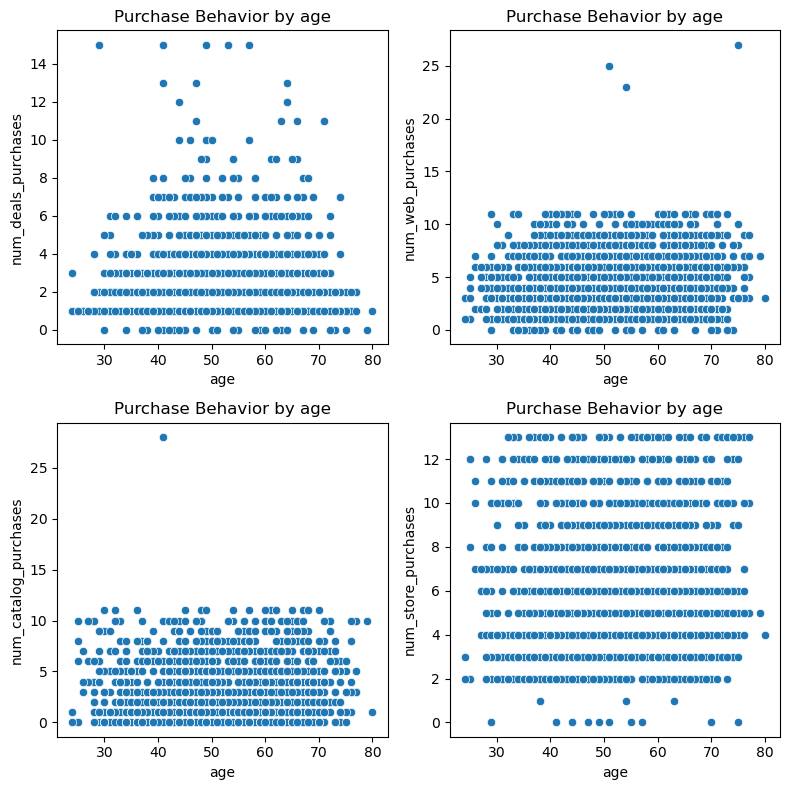

In [26]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
plot = 0
fig = plt.figure(figsize=(8,8))
# looping through the length of the list
for i in range(len(num_purchases_cols)):
    plot += 1
    # setting up the subplots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of of num purchases vs. age
    sns.scatterplot(x=marketing_data["age"], y= marketing_data[num_purchases_cols[i]])
    plt.title("Purchase Behavior by age")

plt.tight_layout()
plt.show();

It is also difficult to decipher any pattern between `age` and any `num_{type}_purchases` in any of these plots. Because of this, a different analysis strategy will be used on the `age` variable.

To do further analysis on the `age` variable, A new column called `age_group` is added to `marketing_data`. It contains the following categories of ages:
* `18 to 35`
* `36 to 50`
* `51 to 70`
* `71 and Older`

This categorical variables may give a more clear story.

In [27]:
# function that breaks up each age into a group
def age_groups(age):
    if 18 <= age <= 35 : 
        return '18 to 35' 
    elif 35 < age <= 50 : 
        return '36 to 50'
    elif 50 < age <= 70 : 
        return '51 to 70'
    else : 
        return '71 and Older'

# applying the function to the dataframe
marketing_data['age_group'] = marketing_data['age'].apply(age_groups)
    

In [28]:
# plotting the age Group variable in a bar chart
plt.figure()
sns.countplot(marketing_data['age_group'], order=['18 to 35', '36 to 50', '51 to 70', '71 and Older'])
plt.show()

ValueError: Input data must be a pandas object to reorder

<Figure size 640x480 with 0 Axes>

The `age_group` variable proved to be much more useful quickly as a bar chart showed that `36 to 50` and `51 to 70` year-old age groups dominated shopping at the store.

To take the analysis further, a new DataFrame is created, which only has information about shopper age (`age` and `age_group`) and the total purchase amounts each age group buys (`mnt_{type}_products`). This new DataFrame will have `age_groups` as row data to make plotting a grouped bar graph easier.

In [ ]:
# new dataframe that is age and purchase amounts columns
age_plus_amounts = marketing_data.loc[:, ('age', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 
'mnt_sweet_products', 'mnt_gold_products')]
# breaking up the age bins
bins = [18, 35, 50, 70, 150]
# age group labels
labels = ['18 to 35', '36 to 50', '51 to 70', '71 and Older']

# adding age group to the new dataframe as rows
age_plus_amounts['age_group'] = pd.cut(age_plus_amounts.age, bins=bins, labels=labels)
age_plus_amounts = age_plus_amounts.groupby('age_group').sum().reset_index()


In [ ]:
print(age_plus_amounts)

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))

col_products = [
'mnt_wines', 
'mnt_fruits', 
'mnt_meat_products', 
'mnt_fish_products', 
'mnt_sweet_products', 
'mnt_gold_products'
]

# bar graph of amount of items bought in the store grouped by age group
age_plus_amounts.plot(x='age_group', y=col_products, kind='bar', ax=ax,  width=0.8, edgecolor='#131313')
plt.title("How Much Customers Buy by age Group")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()

Across the board, `age_group` does not seem to effect purchasing habits. Wine is the most popular bought item for each age group followed by meat products. The least popular bought item is fruits for each age group. The next analysis of interest is to see if `age_group` affects how many items customers buy each time. 

In [ ]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
plot = 0
fig = plt.figure(figsize=(8,8))
# looping through the length of the list
for i in range(len(num_purchases_cols)):
    plot += 1
    # setting up the subplots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of of num purchases vs. age
    sns.boxplot(x=marketing_data["age_group"], y= marketing_data[num_purchases_cols[i]], 
                order=["18 to 35", "36 to 50", "51 to 70", "71 and Older"])
    plt.title("Purchase Behavior by age")

plt.tight_layout()
plt.show()

This chart yields some very interesting insights. Here are some notable ones:
* `18 to 35` and `71 and Older` age groups tend to be the least interested in deals.
* On average, `71 and Older` age group customers tend to shop the most online, in store, and through the catalog.
* `36 to 50` and `51 to 70` age groups are interested in deals. Most likely this is because they receive more deals since they have more loyal customers.

This information could be super helpful for a marketing department as strategies could be used to increase `36 to 50` and `71 and Older` customers for the store.

### Conclusion <a class="anchor" id="conclusion"></a>

#### Findings Overview

It has been shown `income` has the strongest relationship with purchase behavior of customers. However, interesting insights about `education` and `age` along with `age_group` have still been noted. These insights would be very helpful to how this store markets deals to their customers and prices items, such as wine since higher income groups tend to dominate alcohol sales. There is also opportunity to increase market to the `18 to 35` and `71 and Older` age groups to drive products sales. 

#### Next Steps

This dataset also has plenty of information has still not been touched upon yet. Some things to consider in a future analysis are:
* Results from existing marketing campaings
* Geographical data
* Customer marital status
* Customer complaints

Happy Coding!